# Part4: Github Link for IE517 at 2023, HW6
https://github.com/kibae-kim/IE-517-ML-in-Fin-Lab-Section-A/tree/main/IE517_F20_HW7

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Part1: Random forest estimators
- Load ccdefault dataset.
- Split the dataset into training and testing sets 

In [2]:
df = pd.read_csv('ccdefault.csv')
X, y = df.drop('DEFAULT', axis=1), df[['DEFAULT']]
X, y = X.values, y.values.ravel()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=1,
                                                   stratify=y)


- Fit a random forest model, try several different values for N_estimators, report in-sample accuracies. 


In [4]:
num_estimators_list = [50, 100, 150, 200, 250]

for num_estimators in num_estimators_list:
    forest = RandomForestClassifier(n_estimators=num_estimators,
                                   random_state=42)
    forest.fit(X_train, y_train)
    scores = cross_val_score(forest, X, y, cv=10)
    train_accuracy = scores.mean()
    
    print("num_estimators: %d, in-sample accuracy: %.3f" 
         % (num_estimators, train_accuracy))

num_estimators: 50, in-sample accuracy: 0.815
num_estimators: 100, in-sample accuracy: 0.817
num_estimators: 150, in-sample accuracy: 0.817
num_estimators: 200, in-sample accuracy: 0.817
num_estimators: 250, in-sample accuracy: 0.817


# Part2: Random forest feature importance
- Define the best random forest model with the selected value of n_estimators
- Extract feature importances from the best model
- Sort feature importances in descending order
- Print the feature ranking

Feature ranking:
1. feature 6 (0.093143)
2. feature 0 (0.072491)
3. feature 5 (0.056464)
4. feature 12 (0.055893)
5. feature 1 (0.051529)
6. feature 13 (0.050161)
7. feature 14 (0.047452)
8. feature 18 (0.047419)
9. feature 15 (0.046596)
10. feature 17 (0.046101)
11. feature 16 (0.045894)
12. feature 7 (0.044698)
13. feature 19 (0.044152)
14. feature 20 (0.042809)
15. feature 23 (0.042423)
16. feature 22 (0.040634)
17. feature 21 (0.040487)
18. feature 8 (0.028989)
19. feature 9 (0.022010)
20. feature 10 (0.021084)
21. feature 3 (0.018270)
22. feature 11 (0.018203)
23. feature 4 (0.012513)
24. feature 2 (0.010584)


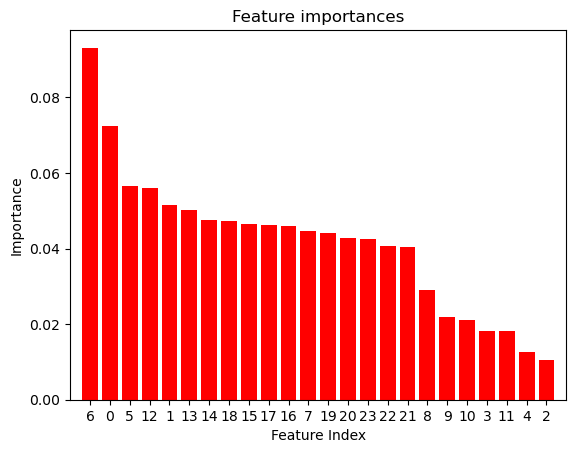

In [7]:
best_forest = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X, y)

importances = best_model.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


# Part 3: Conclusions

a) Increasing the number of trees (estimators) in a random forest generally improves the accuracy of the model, but it also increases the time it takes to run the model.

b) The best number of trees for the ccdefault dataset was found to be 100, which resulted in an accuracy of 81.7%.

c) According to the feature_importances_, the most important features in the ccdefault model were BILL_AMT1, LIMIT_BAL, and PAY_0.

d) Feature importance is a measure of how much each feature contributes to the accuracy of the model. It is calculated by looking at how much each feature reduces the uncertainty (Gini index or entropy) of the model's predictions, and then averaging this over all trees in the forest. Scikit-learn's RandomForestClassifier uses Gini importance by default, which is a normalized measure of the total reduction in impurity achieved by each feature over all trees.

In [8]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
